In [ ]:
import pandas as pd

likes = pd.read_csv('./data/raw songs dataset.csv')
print(likes.columns)
#likes = likes.drop("LikeID", axis=1)
likes.to_parquet("songs.parquet")



Index(['Unnamed: 0.1', 'Unnamed: 0', 'pos', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'duration_ms_x', 'album_name',
       'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms_y', 'time_signature', 'artist_pop', 'genres', 'track_pop'],
      dtype='object')


In [32]:
thing = pd.read_parquet('./data/Followers.parquet')
print(thing)

         FollowerID  UserID  FollowerUserID
0                 1    2359            1001
1                 2    2601            1001
2                 3    1161            1001
3                 4    2176            1001
4                 5    1137            1001
...             ...     ...             ...
1026917     1026918    1376            3000
1026918     1026919    2983            3000
1026919     1026920    2288            3000
1026920     1026921    1968            3000
1026921     1026922    1525            3000

[1026922 rows x 3 columns]


In [33]:
thing['FollowerID'] = thing['FollowerID']//100

         FollowerID  UserID  FollowerUserID
0                 0    2359            1001
1                 0    2601            1001
2                 0    1161            1001
3                 0    2176            1001
4                 0    1137            1001
...             ...     ...             ...
1026917       10269    1376            3000
1026918       10269    2983            3000
1026919       10269    2288            3000
1026920       10269    1968            3000
1026921       10269    1525            3000

[1026922 rows x 3 columns]
      UserID  follower_count
0       1001             431
1       1002             475
2       1003             448
3       1004             443
4       1005             434
...      ...             ...
1995    2996             449
1996    2997             442
1997    2998             411
1998    2999             430
1999    3000             453

[2000 rows x 2 columns]


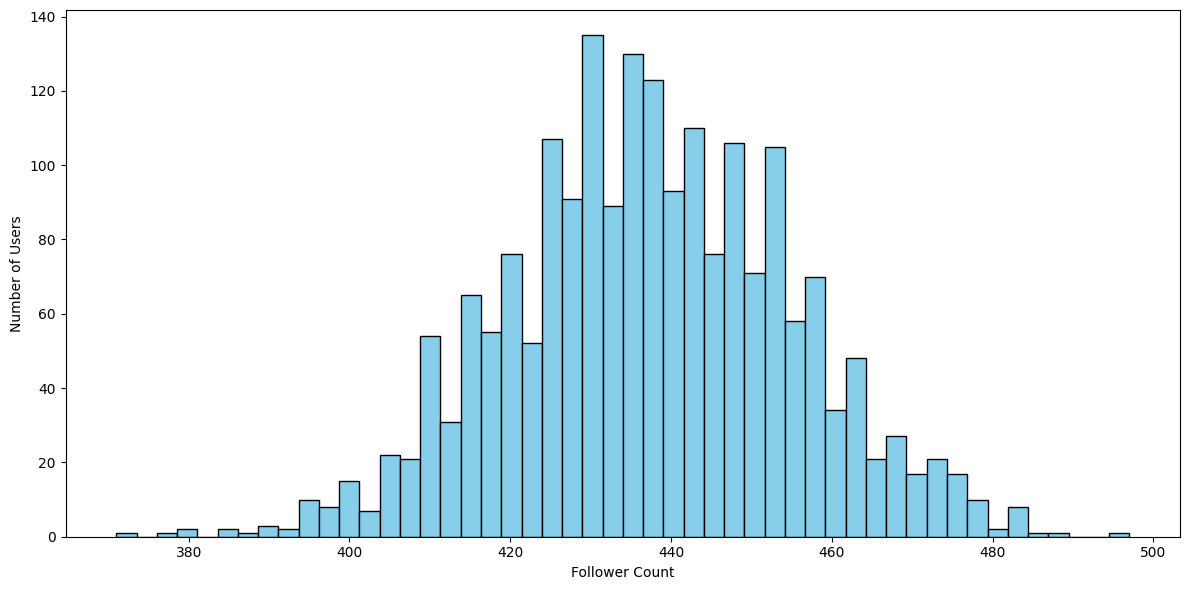

In [40]:
import matplotlib.pyplot as plt

print(thing)
counts = (
    thing.groupby(['UserID'])
      .agg(follower_count=('FollowerUserID', 'nunique'))
      .reset_index()
)
print(counts)
# 2. Pivot into wide format

# Fill missing values with 0 followers

# 3. Plot as stacked area (stacked line)
plt.figure(figsize=(12, 6))
plt.hist(counts['follower_count'], bins=50, color='skyblue', edgecolor='black')
plt.ylabel("Number of Users")
plt.xlabel("Follower Count")
plt.tight_layout()
plt.show()